In [1]:
!python --version   # Python version

# About python:  https://www.python.org/
#                Python is powerful... and fast; plays well with others; runs everywhere; is friendly & easy to learn;
#                is Open –> https://www.python.org/about/.
#     Python docs: https://docs.python.org/3/ (all documentation);
#                  https://docs.python.org/3.7/ (Recommended version – 3.7).
# The Python Tutorial (python3.7): https://docs.python.org/3.7/tutorial/index.html

# Load Module ---
import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns
# NumPy : The fundamental package for scientific computing with Python. NumPy is the fundamental package for scientific
#         computing in Python. It is a Python library that provides a multidimensional array object, various derived
#         objects (such as masked arrays and matrices), and an assortment of routines for fast operations on arrays,
#         including mathematical, logical, shape manipulation, sorting, selecting, I/O, discrete Fourier transforms,
#         basic linear algebra, basic statistical operations, random simulation and much more.
#     About: https://numpy.org/
#     Docs: https://numpy.org/doc/stable/
#     NumPy quickstart: https://numpy.org/doc/stable/user/quickstart.html

# Pandas: pandas is a fast, powerful, flexible and easy to use open source data analysis and manipulation tool,
#         built on top of the Python programming language.
#     About: https://pandas.pydata.org/
#     Docs: https://pandas.pydata.org/docs/
#     Getting started: https://pandas.pydata.org/docs/getting_started/index.html
#     User Guide: https://pandas.pydata.org/docs/user_guide/index.html#user-guide

# Seaborn: Seaborn is a Python data visualization library based on matplotlib. It provides a
#          high-level interface for drawing attractive and informative statistical graphics.
#   About: https://seaborn.pydata.org/

print('numpy version:',np.__version__)
print('pandas version: ',pd.__version__)
print('seaborn version:',sns.__version__)
print('pyplot: ',plt)

Python 3.10.12
numpy version: 1.23.5
pandas version:  1.5.3
seaborn version: 0.12.2
pyplot:  <module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>


# Linear Regression on Non-linear Data ([Moore's Law](https://en.wikipedia.org/wiki/Moore's_law)) (by making data linear using logarithm (log2) scale)

Source (data): https://ourworldindata.org/grapher/transistors-per-microprocessor

Direct Drive Link: https://drive.google.com/file/d/1VLY5-DlAKGfvaa5rqKQKmQLmpY1vAdNY/view?usp=share_link

### download data

In [ ]:
# Drive link: https://drive.google.com/file/d/1VLY5-DlAKGfvaa5rqKQKmQLmpY1vAdNY/view?usp=share_link
!gdown "1VLY5-DlAKGfvaa5rqKQKmQLmpY1vAdNY"

Downloading...
From: https://drive.google.com/uc?id=1VLY5-DlAKGfvaa5rqKQKmQLmpY1vAdNY
To: /content/transistors-per-microprocessor.csv
100% 738/738 [00:00<00:00, 3.36MB/s]


### load data (as pandas dataframe)

In [ ]:
cpu_law=pd.read_csv('transistors-per-microprocessor.csv')                       # read data (as csv file)
cpu_law.head()                                                                  # see head data (first five rows)

,Entity,Code,Year,Transistors per microprocessor
0,World,OWID_WRL,1971,2308
1,World,OWID_WRL,1972,3555
2,World,OWID_WRL,1974,6098
3,World,OWID_WRL,1979,29164
4,World,OWID_WRL,1982,135773


In [ ]:
cpu_law.tail()                                                                  # see tail (last five rows)

,Entity,Code,Year,Transistors per microprocessor
19,World,OWID_WRL,2009,2308241527
20,World,OWID_WRL,2013,5000000000
21,World,OWID_WRL,2014,5700000000
22,World,OWID_WRL,2015,10000000000
23,World,OWID_WRL,2017,19200000000


In [ ]:
cpu_law.shape                                                                   # see shape of data (row, column)

(24, 4)

In [ ]:
cpu_law.size                                                                    # see size of data

96

In [ ]:
cpu_law.index                                                                   # all indexs (row indexs)

RangeIndex(start=0, stop=24, step=1)

In [ ]:
cpu_law.columns                                                                 # see column names

Index(['Entity', 'Code', 'Year', 'Transistors per microprocessor'], dtype='object')

### data info and stats

In [ ]:
cpu_law.info()                                                                  # see info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 4 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Entity                          24 non-null     object
 1   Code                            24 non-null     object
 2   Year                            24 non-null     int64 
 3   Transistors per microprocessor  24 non-null     int64 
dtypes: int64(2), object(2)
memory usage: 896.0+ bytes


In [ ]:
cpu_law.describe()                                                              # see stats (numerical data)

,Year,Transistors per microprocessor
count,24.000000,2.400000e+01
mean,1997.208333,1.854749e+09
std,13.837502,4.423666e+09
min,1971.000000,2.308000e+03
25%,1988.000000,9.743862e+05
50%,2000.500000,3.986546e+07
75%,2006.250000,6.386667e+08
max,2017.000000,1.920000e+10


In [ ]:
cpu_law.describe(include=object)                                                # see stats (object type data)

,Entity,Code
count,24,24
unique,1,1
top,World,OWID_WRL
freq,24,24


In [ ]:
cpu_law.isna().sum()                                                            # check for numerical null

Entity                            0
Code                              0
Year                              0
Transistors per microprocessor    0
dtype: int64

In [ ]:
# As pandas.DataFrame.isna -> Return a boolean same-sized object indicating if the values are NA.
#   NA values, such as None or numpy.NaN, gets mapped to True values. Everything else gets mapped to False values. Characters such as empty
#   strings '' or numpy.inf are not considered NA values (unless you set pandas.options.mode.use_inf_as_na = True).
# So object type columns may have abnormal (or missing) value like "?" or " " (single space). Thus make a check for abnormal values
# search for abnormal values in data like - "?", "-", " " (single space), "" (empty string), etc
for abnormal in ['?','-','_',' ','\t','\n','']: print(f'Count of "{abnormal}" is:',(cpu_law==abnormal).sum().sum())
# Thus no abnormal value found !

Count of "?" is: 0
Count of "-" is: 0
Count of "_" is: 0
Count of " " is: 0
Count of "	" is: 0
Count of "
" is: 0
Count of "" is: 0


### plot data

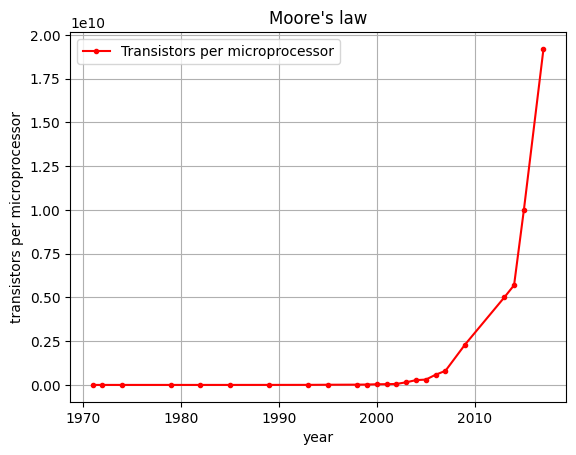

In [ ]:
#plt.plot(cpu_law['Year'],cpu_law['Transistors per microprocessor'])            # plot data (using matplotlib.pyplot) # or
cpu_law.plot(x='Year',y='Transistors per microprocessor',color='r',marker='.')  # or plot data (using pandas)
plt.xlabel('year'),plt.ylabel('transistors per microprocessor'),plt.title('cpu law')# add axis labels and title
plt.grid(),plt.title('Moore\'s law')                                            # add grid and title to plot
plt.show()                                                                      # make show plot

### make data Linear - Log2 of data

In [ ]:
# make data linear - As Moore's law is the observation that the number of transistors in an integrated circuit (IC) doubles about every
#   two years, so log2 (logarithm function wit base 2) must be linear. So, taking log2 of transistor count
# make new column (name - log2 of transistors per microprocessor count)
cpu_law['log2 of transistors per microprocessor']=np.log2(cpu_law['Transistors per microprocessor'])# take log2 of "Transistors per microprocessor" column
cpu_law.head()                                                                  # see head

,Entity,Code,Year,Transistors per microprocessor,log2 of transistors per microprocessor
0,World,OWID_WRL,1971,2308,11.172428
1,World,OWID_WRL,1972,3555,11.795634
2,World,OWID_WRL,1974,6098,12.574120
3,World,OWID_WRL,1979,29164,14.831901
4,World,OWID_WRL,1982,135773,17.050837


#### make plot data

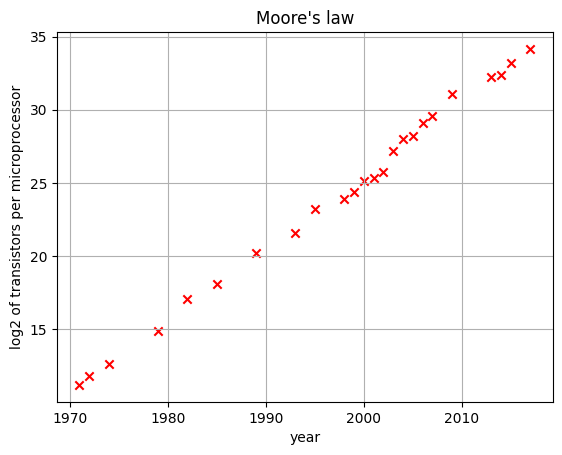

In [ ]:
plt.scatter(cpu_law['Year'],cpu_law['log2 of transistors per microprocessor'],color='r',marker='x')# plot data (scaled to linear)
plt.xlabel('year'),plt.ylabel('log2 of transistors per microprocessor')         # add axis labels
plt.grid(),plt.title('Moore\'s law')                                            # add grid and title to plot
plt.show()                                                                      # make show plot

### split data - train and test (by [sklearn.model_selection.train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html))

In [ ]:
from sklearn.model_selection import train_test_split                            # load data splitting method

# make data split -> as dataframe and series (shuffle and split data)
Xtrain,Xtest,ytrain,ytest=train_test_split(cpu_law[['Year']],cpu_law['log2 of transistors per microprocessor'],test_size=0.10)
Xtrain.shape,ytrain.shape,Xtest.shape,ytest.shape                               # see shape of data after split

((21, 1), (21,), (3, 1), (3,))

### make linear model - **[Linear Regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)**

In [ ]:
from sklearn.linear_model import LinearRegression                               # load LinearRegression class

lReg=LinearRegression()                                                         # make model (object)
lReg.fit(Xtrain,ytrain)                                                         # make model train (find m and c for y = mx + c)
# Here, X -> "Year" and y -> "log2 of transistors per microprocessor" .

# see hyperparameter values m (coefficient) and c (intercept)
print('Coefficient:',lReg.coef_)                                                # see coefficient
print('Intercept:',lReg.intercept_)                                             # see intercept

Coefficient: [0.5043736]
Intercept: -983.1908754533293


#### evaluate model

In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error              # load error modules

# evaluate error - training error
print('MAE (training error):',mean_absolute_error(ytrain,lReg.predict(Xtrain))) # mean absolute error
print('MSE (training error):',mean_squared_error(ytrain,lReg.predict(Xtrain)))  # mean squared error

# evaluate error - testing error
print('MAE (testing error):',mean_absolute_error(ytest,lReg.predict(Xtest)))    # mean absolute error
print('MSE (testing error):',mean_squared_error(ytest,lReg.predict(Xtest)))     # mean squared error

MAE (training error): 0.39305209140696207
MSE (training error): 0.23018989327900694
MAE (testing error): 0.18620630395432988
MSE (testing error): 0.053231779476048464


#### make prediction

In [ ]:
cpu_law['prediction']=lReg.predict(cpu_law[['Year']])                           # add all prediction to new column in dataframe
cpu_law.head()                                                                  # see head

,Entity,Code,Year,Transistors per microprocessor,log2 of transistors per microprocessor,prediction
0,World,OWID_WRL,1971,2308,11.172428,10.929489
1,World,OWID_WRL,1972,3555,11.795634,11.433863
2,World,OWID_WRL,1974,6098,12.574120,12.442610
3,World,OWID_WRL,1979,29164,14.831901,14.964478
4,World,OWID_WRL,1982,135773,17.050837,16.477599


### plot prediction results

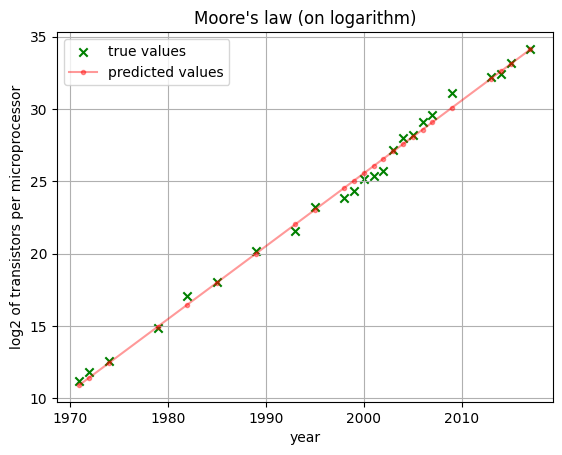

In [ ]:
# plot data - on log2 scale
plt.scatter(cpu_law['Year'],cpu_law['log2 of transistors per microprocessor'],color='g',marker='x',label='true values')# plot true values
plt.plot(cpu_law['Year'],cpu_law['prediction'],color='r',marker='.',alpha=0.4,label='predicted values')# plot predictions
plt.grid(),plt.xlabel('year'),plt.ylabel('log2 of transistors per microprocessor')# add axis labels and grid
plt.legend(),plt.title('Moore\'s law (on logarithm)')                           # add legend and title to plot
plt.show()                                                                      # make show plot

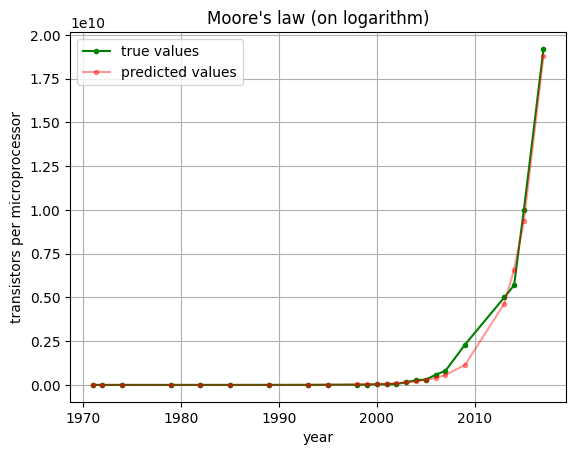

In [ ]:
# plot data - on original scale
plt.plot(cpu_law['Year'],cpu_law['Transistors per microprocessor'],color='g',marker='.',label='true values')# plot true values
plt.plot(cpu_law['Year'],np.power(2,cpu_law['prediction']),color='r',marker='.',alpha=0.4,label='predicted values')# plot predictions
plt.grid(),plt.xlabel('year'),plt.ylabel('transistors per microprocessor')      # add axis labels and grid
plt.legend(),plt.title('Moore\'s law (on logarithm)')                           # add legend and title to plot
plt.show()                                                                      # make show plot

# Linear Regression on Non-linear Data (Moore's Law) (with [Polynomial Features](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html))

#### download and load data

In [2]:
!gdown "1Xy_FjAF1CXfIhc70Xty3aX70TWhEnzGP"                                      # download file form google drive

Downloading...
From: https://drive.google.com/uc?id=1Xy_FjAF1CXfIhc70Xty3aX70TWhEnzGP
To: /content/cpu_law.csv
100% 5.51k/5.51k [00:00<00:00, 24.4MB/s]


In [3]:
#cpu_law=pd.read_csv('/content/cpu_law.csv')                                     # load file
#cpu_law.drop(columns='Unnamed: 0',inplace=True)                                 # make index (Unnamed: 0) column drop # or
cpu_law=pd.read_csv('/content/cpu_law.csv',index_col=0)                         # load file
cpu_law.head()                                                                  # see head

,Processor,Transistor count,Date of introduction,Designer,Process,Area
0,TMS 1000,8000,1971,Texas Instruments,8000.0,NaN
1,Intel 4004,2300,1971,Intel,10000.0,12.0
2,Intel 8008,3500,1972,Intel,10000.0,14.0
3,MOS Technology 6502,3510,1975,MOS Technology,8000.0,21.0
4,Motorola 6800,4100,1974,Motorola,6000.0,16.0


#### make plot data

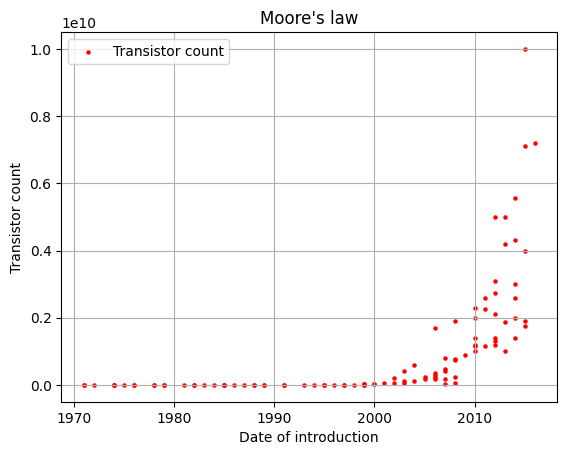

In [4]:
cpu_law.plot.scatter(x='Date of introduction',y='Transistor count',color='red',marker='.',label='Transistor count')# plot data (by pandas dataframe)
#plt.scatter(cpu_law['Date of introduction'],cpu_law['Transistor count'],color='red',marker='.',label='Transistor count')# or by (matplotlib.pyplot)
plt.xlabel('Date of introduction'),plt.ylabel('Transistor count'),plt.title('cpu law')# add axis labels and title
plt.grid(),plt.title('Moore\'s law')                                            # add grid and title to plot
plt.show()                                                                      # make show plot

#### split data - train and test (by [sklearn.model_selection.train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html))

In [6]:
from sklearn.model_selection import train_test_split                            # load data splitting method

# make data split -> as dataframe and series (shuffle and split data)
Xtrain,Xtest,ytrain,ytest=train_test_split(cpu_law[['Date of introduction']],cpu_law['Transistor count'],test_size=0.10)
Xtrain.shape,ytrain.shape,Xtest.shape,ytest.shape                               # see shape of data after split

((91, 1), (91,), (11, 1), (11,))

#### make model -

* **[Polynomial Features](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html)**: Generate polynomial and interaction features. Generate a new feature matrix consisting of all polynomial combinations of the features with degree less than or equal to the specified degree. For example, if an input sample is two dimensional and of the form [a, b], the degree-2 polynomial features are [1, a, b, a^2, ab, b^2].

* **[Linear Regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)**: Ordinary least squares Linear Regression. LinearRegression fits a linear model with coefficients w = (w1, …, wp) to minimize the residual sum of squares between the observed targets in the dataset, and the targets predicted by the linear approximation.

In [7]:
from sklearn.preprocessing import PolynomialFeatures                            # load modele - Polynomial Features
# Source: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html
from sklearn.linear_model import LinearRegression                               # load modele - Linear Regression
# Source: https://scikit-learn.org/stable/auto_examples/model_selection/plot_underfitting_overfitting.html
from sklearn.pipeline import Pipeline                                           # load model - Pipeline
# Source: https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html
from sklearn.metrics import mean_absolute_error                                 # load error - Mean Absolute Error
# Source: https://en.wikipedia.org/wiki/Mean_absolute_error

models=dict()                                                                   # make dictionary to record model and its results
scores=list()                                                                   # make list to record scores

for degree in range(2,90):                                                      # make loop to find best model for degree 2 to 90
  # make model pipeline: (PolynomialFeatures -> LinearRegression)
  pipeline=Pipeline([('preprocessing',PolynomialFeatures(degree=degree)),('linear_model',LinearRegression())],verbose=False)
  pipeline.fit(Xtrain,ytrain)                                                   # make pipeline fit
  models[degree]=pipeline                                                       # make recored trained model
  scores.append(mean_absolute_error(ytest,pipeline.predict(Xtest)))             # make calculate error and record error

print('Best score:',np.min(scores),'; at:',np.argmin(scores)+2)                 # print best score
print('Worse score:',np.max(scores),'; at:',np.argmax(scores)+2)                # print minimum score
print('Mean score:',np.mean(scores))                                            # print average score

Best score: 206265474.59712532 ; at: 89
Worse score: 690159588.2769886 ; at: 2
Mean score: 258511506.9014861


#### Evaluate model (for best - degree -> 89)

In [10]:
from sklearn.metrics import mean_absolute_error,mean_squared_error              # load error methods

# evaluate error - training error (degree - 89)
print('MAE (training error):',mean_absolute_error(ytrain,models[89].predict(Xtrain)))# calculate mean absolute error
print('MSE (training error):',mean_squared_error(ytrain,models[89].predict(Xtrain)))# calculate mean squared error

# evaluate error - testing error (degree - 89)
print('MAE (testing error):',mean_absolute_error(ytest,models[89].predict(Xtest)))# calculate mean absolute error
print('MSE (testing error):',mean_squared_error(ytest,models[89].predict(Xtest)))# calculate mean squared error

MAE (training error): 597534302.1114856
MSE (training error): 1.0815363950995672e+18
MAE (testing error): 206265474.59712532
MSE (testing error): 7.134717276730239e+16


#### make prediction

In [11]:
cpu_law['prediction']=models[89].predict(cpu_law[['Date of introduction']])     # add all prediction (for degree -> 89) to new column in dataframe
cpu_law.head()                                                                  # see head

,Processor,Transistor count,Date of introduction,Designer,Process,Area,prediction
0,TMS 1000,8000,1971,Texas Instruments,8000.0,NaN,-3.867437e+08
1,Intel 4004,2300,1971,Intel,10000.0,12.0,-3.867437e+08
2,Intel 8008,3500,1972,Intel,10000.0,14.0,-2.987767e+08
3,MOS Technology 6502,3510,1975,MOS Technology,8000.0,21.0,-7.541164e+07
4,Motorola 6800,4100,1974,Motorola,6000.0,16.0,-1.429244e+08


#### plot prediction results

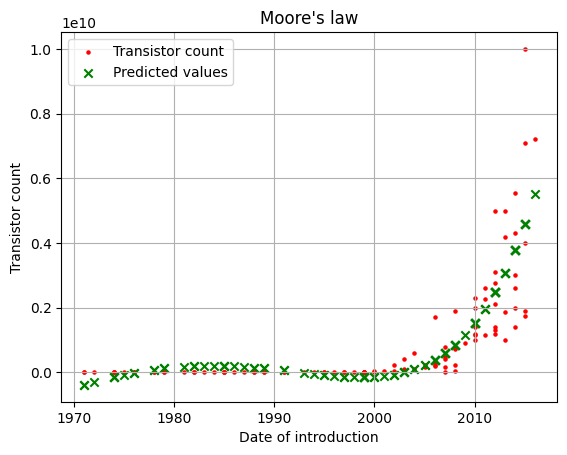

In [14]:
cpu_law.plot.scatter(x='Date of introduction',y='Transistor count',color='red',marker='.',label='Transistor count')# plot true values (by pandas dataframe)
plt.scatter(cpu_law['Date of introduction'],cpu_law['prediction'],color='green',marker='x',label='Predicted values')# plot predictions
plt.xlabel('Date of introduction'),plt.ylabel('Transistor count'),plt.title('cpu law')# add axis labels and title
plt.grid(),plt.legend(),plt.title('Moore\'s law')                               # add grid, legend and title to plot
plt.show()                                                                      # make show plot

# References / Further reading

* [Official python docs](https://docs.python.org/3/)
* [Official python tutorials](https://docs.python.org/3/tutorial/index.html)
* [Python Numpy Tutorial (with Jupyter and Colab) - Stanford - Spring 2022](https://cs231n.github.io/python-numpy-tutorial/)
* [NumPy: the absolute basics for beginners](https://numpy.org/devdocs/user/absolute_beginners.html)
* [10 minutes to pandas](https://pandas.pydata.org/pandas-docs/stable/user_guide/10min.html)
* [Matplotlib - Tutorials](https://matplotlib.org/stable/tutorials/index)
* [An introduction to seaborn](https://seaborn.pydata.org/tutorial/introduction.html)
* [Underfitting vs. Overfitting](https://scikit-learn.org/stable/auto_examples/model_selection/plot_underfitting_overfitting.html)